C:\Users\tan04\AppData\Local\Temp\ipykernel_18348\2280407413.py:48: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 0.85, 1])
C:\Users\tan04\AppData\Local\Temp\ipykernel_18348\2280407413.py:48: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 0.85, 1])
C:\Users\tan04\AppData\Local\Temp\ipykernel_18348\2280407413.py:48: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 0.85, 1])
C:\Users\tan04\AppData\Local\Temp\ipykernel_18348\2280407413.py:48: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 0.85, 1])
C:\Users\tan04\AppData\Local\Temp\ipykernel_18348\2280407413.py:48: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 0.85, 1])
C:\Users\tan04\AppData\Lo

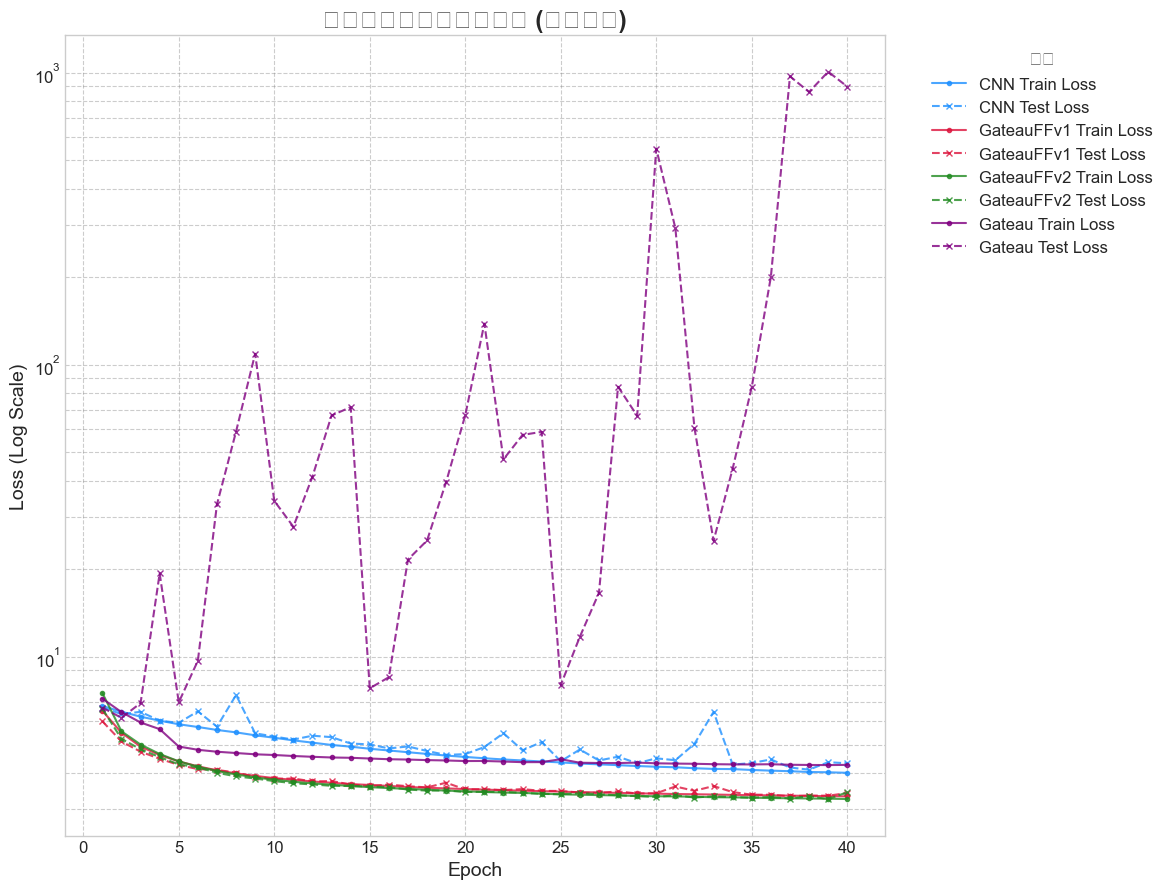

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


cnn_df = pd.read_csv("cnn.csv")
gateauffv1_df = pd.read_csv("gateauffv1.csv")
gateauffv2_df = pd.read_csv("gateauffv2.csv")
original_df = pd.read_csv("original.csv")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 9))

# 封装一个绘图函数，方便复用
def plot_loss(df, model_name, train_col, test_col, epoch_col, train_style, test_style, color):
    """用于绘制训练和测试损失的辅助函数"""
    if train_col in df.columns and test_col in df.columns and epoch_col in df.columns:
        ax.plot(df[epoch_col], df[train_col], linestyle=train_style, color=color, label=f'{model_name} Train Loss', marker='o', markersize=3, alpha=0.8)
        ax.plot(df[epoch_col], df[test_col], linestyle=test_style, color=color, label=f'{model_name} Test Loss', marker='x', markersize=4, alpha=0.8)
    else:
        print(f"警告: 未找到 {model_name} 的数据列。")

# --- 为每个模型绘图 ---
# 经检查，所有文件的列名均为 'epoch', 'loss' (训练损失), 'val_loss' (测试损失)

# CNN 模型 (蓝色)
plot_loss(cnn_df, 'CNN', 'Train Loss', 'Test Loss', 'Epoch', '-', '--', 'dodgerblue')

# GateauFFv1 模型 (红色)
plot_loss(gateauffv1_df, 'GateauFFv1', 'Train Loss', 'Test Loss', 'Epoch', '-', '--', 'crimson')

# GateauFFv2 模型 (绿色)
plot_loss(gateauffv2_df, 'GateauFFv2', 'Train Loss', 'Test Loss', 'Epoch', '-', '--', 'forestgreen')
plot_loss(original_df, 'Gateau', 'Train Loss', 'Test Loss', 'Epoch', '-', '--', 'purple')

# --- 图表最终配置 ---
ax.set_yscale('log')
ax.set_title('模型训练与测试损失对比 (对数尺度)', fontsize=18, fontweight='bold')
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Loss (Log Scale)', fontsize=14)

# 配置图例，放置在图表外部以保持清晰
ax.legend(fontsize=12, title='图例', title_fontsize='13', bbox_to_anchor=(1.04, 1), loc='upper left')

ax.grid(True, which="both", ls="--", color='gray', alpha=0.4)
ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout(rect=[0, 0, 0.85, 1]) 

plt.show()

